# Experiencia Empleado

In [227]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
import cufflinks as cf

cf.go_offline()

In [228]:
df=pd.read_csv('Experiencia de Empleado_2 septiembre 2021_12.38.csv')

C:\Users\VDMG015\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning:

Columns (4,5,6,9,12,13,14,26,29,33,39,40,41,42,43,44,47,48,49,54,77,78,79,90,105,108,112,113,114,115,116,117,118,119,122) have mixed types.Specify dtype option on import or set low_memory=False.



In [229]:
df=df.iloc[2:].reset_index(drop=True)

In [230]:
df['EndDate']=pd.to_datetime(df['EndDate'])

In [231]:
df['FECHA_NPS'].value_counts().index

Index(['01/07/2020', '01/08/2020', '01/06/2020', '01/12/2020', 'JULIO_2021',
       '01/10/2020', '01/09/2020', '01/02/2021', '01/01/2021', '01/03/2021',
       '01/05/2021', '01/11/2020', '202104', '2021 08', '01/06/2021',
       '01/05/2020', '2021-06', '01-jul-20', '01Dec2020', '01-sep-20',
       '01-oct-20', '01-nov-20', '01Aug2020'],
      dtype='object')

In [232]:
df['FECHA_NPS'].replace({'JULIO_2021':'01/07/2021','202104':'01/04/2021','2021-06':'01/06/2021', '01-jul-20':'01/07/2020', '01-sep-20':'01/09/2020', '01-nov-20':'01/11/2020', '01Dec2020':'01/12/2020','01Aug2020':'01/08/2020','01-oct-20':'01/10/2020'},inplace=True)

In [233]:
df['FECHA_NPS']=pd.to_datetime(df['FECHA_NPS'],dayfirst=True)

In [234]:
df['FECHA_NPS'].value_counts()

2020-07-01    856
2020-08-01    797
2020-06-01    784
2020-12-01    556
2020-10-01    527
2021-07-01    516
2020-09-01    493
2021-02-01    403
2021-01-01    402
2021-03-01    399
2021-05-01    376
2020-11-01    358
2021-04-01    307
2021-08-01    283
2021-06-01    254
2020-05-01    127
Name: FECHA_NPS, dtype: int64

In [235]:
df['Region']=df['Region_Telcel'].replace({'METROPOLITANO':'R09', 'PUEBLA':'R07', 'GUADALAJARA':'R05', 'QUERETARO':'R06',
       'MERIDA':'R08', 'MONTERREY':'R04', 'CHIHUAHUA':'R03', 'TIJUANA':'R01', 'HERMOSILLO':'R02'})

In [236]:
df['Region'].value_counts()

CORPORATIVO    1578
R09            1406
R07             792
R05             688
R06             669
R08             620
R04             553
R03             440
R01             363
R02             355
Name: Region, dtype: int64

Chihuahua es R3, Guadalajara es R5, Hermosillo R2, Merida R8,Metro R9, Mty R4, Qro R6 y Tijuana R1

# Encuestados por grupos

## Sexo

In [237]:
df.groupby([df['FECHA_NPS'].dt.to_period('M'),'SEXO'])['EMP'].count().unstack().iplot()

## Dirección

In [238]:
df.groupby([df['FECHA_NPS'].dt.to_period('M'),'Area_direccion'])['EMP'].count().unstack().fillna(0).T.style.background_gradient(cmap='PuBu').to_excel('Enc_Dir.xlsx')

In [239]:
df.groupby([df['FECHA_NPS'].dt.to_period('M'),'Area_direccion'])['EMP'].count().unstack().fillna(0).T.style.background_gradient(cmap='PuBu')

FECHA_NPS,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08
Area_direccion,,,,,,,,,,,,,,,,
DIR ADJUNTA ASUNTOS REGULATORIOS,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,0.000000
DIR ADJUNTA JURIDICA AM,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
DIR ADMON DE PRODUCTOS FIJOS,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000,0.000000,1.000000,1.000000
DIR COMPRAS,0.000000,5.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,2.000000,1.000000
DIR DESARROLLO CORPORATIVO,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
DIR EJECUTIVA DE UNIDADES REGIONALES,0.000000,13.000000,14.000000,6.000000,5.000000,3.000000,1.000000,5.000000,5.000000,1.000000,2.000000,1.000000,3.000000,0.000000,1.000000,1.000000
DIR FINANZAS Y ADMINISTRACION,0.000000,31.000000,30.000000,26.000000,24.000000,16.000000,11.000000,25.000000,13.000000,15.000000,14.000000,6.000000,17.000000,7.000000,11.000000,10.000000
DIR FINANZAS Y ADMON AM,0.000000,0.000000,13.000000,8.000000,8.000000,3.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000,5.000000,4.000000,2.000000,1.000000
DIR GENERAL,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Hubo una diferencia en la distribución de respuestas en el mes de julio de este año. Se supuso que podía tener que ver con la baja del ENPS, sin embargo, los números de agosto también son mabjos, y no se observa este fenómeno. Por lo tanto, podemos descartar la asociación de la baja con esto

## Región Telcel

In [240]:
df.groupby([df['FECHA_NPS'].dt.to_period('M'),'Region_Telcel'])['EMP'].count().unstack().dropna().T.style.background_gradient(cmap='PuBu')

FECHA_NPS,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08
Region_Telcel,,,,,,,,,,,,,,,
CHIHUAHUA,45.000000,54.000000,46.000000,32.000000,39.000000,18.000000,28.000000,23.000000,23.000000,27.000000,18.000000,22.000000,16.000000,29.000000,19.000000
CORPORATIVO,195.000000,174.000000,185.000000,127.000000,90.000000,71.000000,116.000000,81.000000,78.000000,71.000000,44.000000,64.000000,49.000000,52.000000,48.000000
GUADALAJARA,75.000000,82.000000,79.000000,51.000000,48.000000,21.000000,59.000000,39.000000,39.000000,33.000000,29.000000,32.000000,24.000000,54.000000,22.000000
HERMOSILLO,37.000000,44.000000,31.000000,14.000000,22.000000,16.000000,25.000000,22.000000,24.000000,32.000000,18.000000,16.000000,15.000000,22.000000,14.000000
MERIDA,65.000000,85.000000,73.000000,30.000000,44.000000,34.000000,49.000000,27.000000,24.000000,32.000000,32.000000,24.000000,19.000000,59.000000,22.000000
METROPOLITANO,143.000000,146.000000,134.000000,71.000000,108.000000,76.000000,109.000000,76.000000,87.000000,87.000000,67.000000,99.000000,55.000000,70.000000,74.000000
MONTERREY,44.000000,61.000000,54.000000,33.000000,33.000000,29.000000,32.000000,35.000000,47.000000,19.000000,29.000000,27.000000,28.000000,59.000000,20.000000
PUEBLA,95.000000,82.000000,75.000000,56.000000,59.000000,35.000000,68.000000,36.000000,36.000000,36.000000,24.000000,36.000000,26.000000,90.000000,33.000000
QUERETARO,58.000000,83.000000,78.000000,47.000000,52.000000,41.000000,49.000000,40.000000,24.000000,38.000000,28.000000,34.000000,14.000000,55.000000,24.000000


In [241]:
df.groupby([df['FECHA_NPS'].dt.to_period('M'),'Region_Telcel'])['EMP'].count().unstack().dropna().T[['2020-10', '2020-11',
             '2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-05',
             '2021-06', '2021-07']].style.background_gradient(cmap='PuBu').to_excel('EPR.xlsx')

## Home Office

In [242]:
df.groupby([df['FECHA_NPS'].dt.to_period('M'),'Q38'])['EMP'].count().unstack().dropna().T.style.background_gradient(cmap='PuBu')

FECHA_NPS,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08
Q38,,,,,,,,,,,,,,,
No,45,57,47,46,62,56,85,53,51,52,44,25,54,126,70
Sí,546,453,398,233,239,131,227,118,136,107,104,46,84,145,85
Trabajo combinado (he ido a las oficinas de Telcel y también hago home office),193,163,135,111,208,168,236,139,118,132,87,40,71,100,88


In [243]:
df.groupby([df['FECHA_NPS'].dt.to_period('M'),'SEXO','Q38'])['EMP'].count().unstack().dropna().T.style.background_gradient(cmap='PuBu')

In [244]:
df.groupby([df['FECHA_NPS'].dt.to_period('M'),'Q38'])['EMP'].count().unstack().dropna().T.style.background_gradient(cmap='PuBu').to_excel('EPHO.xlsx')

Misma situación con los demás grupos. 

## NPS Empresa por grupos

In [245]:
emp=df.groupby([df['FECHA_NPS'].dt.to_period('M'),'SEXO','Q3_NPS_GROUP'])['EMP'].count().unstack()

In [246]:
emp=(((emp['Promotor']-emp['Detractor'])/emp.sum(axis=1).astype('int'))*100).unstack()

In [247]:
emp.to_excel('NPS_Trabajo_Telcel.xlsx')

In [248]:
n=df.groupby([df['FECHA_NPS'].dt.to_period('M'),'Q3_NPS_GROUP'])['EMP'].count().unstack()
n=(((n['Promotor']-n['Detractor'])/n.sum(axis=1).astype('int'))*100)

In [249]:
emp=pd.concat([emp,n],axis=1).dropna()

In [250]:
emp.columns=['HOMBRE', 'MUJER', 'Total']

## Sexo

In [251]:
emp.style.background_gradient(cmap='PuBu')

,HOMBRE,MUJER,Total
FECHA_NPS,,,
2020-06,86.099585,85.761589,85.969388
2020-07,83.520599,87.341772,84.941176
2020-08,85.823755,87.121212,86.259542
2020-09,84.000000,78.125000,82.061856
2020-10,83.383686,80.526316,82.341651
2020-11,78.542510,78.181818,78.431373
2020-12,87.811634,83.419689,86.281588
2021-01,85.820896,82.812500,84.848485
2021-02,80.933852,85.611511,82.575758


In [252]:
emp.iplot()

In [253]:
a=df.groupby([df['FECHA_NPS'].dt.to_period('M'),'Region_Telcel','Q3_NPS_GROUP'])['EMP'].count().unstack()
a.fillna(0,inplace=True)
a=(((a['Promotor']-a['Detractor'])/a.sum(axis=1).astype('int'))*100).unstack()

## Región

In [254]:
a.dropna().style.background_gradient(cmap='PuBu')

Region_Telcel,CHIHUAHUA,CORPORATIVO,GUADALAJARA,HERMOSILLO,MERIDA,METROPOLITANO,MONTERREY,PUEBLA,QUERETARO,TIJUANA
FECHA_NPS,,,,,,,,,,
2020-06,86.666667,76.410256,80.000000,89.189189,95.384615,88.811189,88.636364,97.894737,79.310345,96.296296
2020-07,90.566038,79.651163,81.707317,93.023256,89.411765,77.241379,90.163934,90.123457,89.156627,88.888889
2020-08,82.608696,81.868132,87.341772,90.000000,95.833333,86.259542,81.481481,87.671233,84.415584,95.238095
2020-09,84.375000,79.674797,80.000000,85.714286,86.666667,88.732394,71.875000,90.909091,78.723404,70.967742
2020-10,81.578947,74.444444,70.833333,95.454545,90.909091,78.703704,87.500000,92.982456,78.431373,96.774194
2020-11,83.333333,80.281690,71.428571,87.500000,85.294118,82.894737,65.517241,76.470588,80.487805,52.941176
2020-12,78.571429,81.896552,87.931034,92.000000,91.836735,88.888889,78.125000,88.235294,85.714286,90.476190
2021-01,95.652174,82.500000,78.947368,85.714286,92.307692,93.421053,69.696970,80.555556,90.000000,73.913043
2021-02,82.608696,83.333333,78.378378,100.000000,95.833333,73.255814,65.957447,91.428571,100.000000,95.000000


In [255]:
a.dropna().style.background_gradient(cmap='PuBu').to_excel('ENPSR.xlsx')

In [256]:
a=df.groupby([df['FECHA_NPS'].dt.to_period('M'),'Region','Q3_NPS_GROUP'])['EMP'].count().unstack()
a.fillna(0,inplace=True)
a=(((a['Promotor']-a['Detractor'])/a.sum(axis=1).astype('int'))*100).unstack()
b=df.groupby([df['FECHA_NPS'].dt.to_period('M'),df['Region'].map(lambda x: 'DEUR' if (x!='CORPORATIVO') & (x!='R09') else x),'Q3_NPS_GROUP'])['EMP'].count().unstack()
b.fillna(0,inplace=True)
b=(((b['Promotor']-b['Detractor'])/b.sum(axis=1).astype('int'))*100).unstack()
c=df.groupby([df['FECHA_NPS'].dt.to_period('M'),df['Region'].map(lambda x: 'Total' if (x!='CORPORATIVO') | (x!='R09') else x),'Q3_NPS_GROUP'])['EMP'].count().unstack()
c.fillna(0,inplace=True)
c=(((c['Promotor']-c['Detractor'])/c.sum(axis=1).astype('int'))*100).unstack()
d=df.groupby([df['FECHA_NPS'].dt.to_period('M'),df['Region'].map(lambda x: 'R09 + Corp' if (x=='CORPORATIVO') | (x=='R09') else x),'Q3_NPS_GROUP'])['EMP'].count().unstack()
d.fillna(0,inplace=True)
d=(((d['Promotor']-d['Detractor'])/d.sum(axis=1).astype('int'))*100).unstack()

In [257]:
pd.concat([a,b['DEUR'],d['R09 + Corp'],c['Total']], axis=1).dropna().style.background_gradient(cmap='PuBu').to_excel('ENPS_ag.xlsx')

In [31]:
df['Region'].map(lambda x: 'DEUR' if (x!='CORPORATIVO') & (x!='R09') else x).value_counts()

DEUR           4650
CORPORATIVO    1629
R09            1464
Name: Region, dtype: int64

### Promedio 

In [32]:
a.mean().reset_index().style.background_gradient(cmap='PuBu')

,Region_Telcel,0
0,CHIHUAHUA,87.553796
1,CORPORATIVO,72.862660
2,GUADALAJARA,78.571515
3,HERMOSILLO,89.124649
4,MERIDA,92.752570
5,METROPOLITANO,83.083675
6,MONTERREY,74.285242
7,PUEBLA,89.095300
8,QUERETARO,81.514127
9,TIJUANA,85.463681


In [194]:
a.mean().reset_index().style.background_gradient(cmap='PuBu').to_excel('PPR.xlsx')

In [33]:
a=df.groupby([df['FECHA_NPS'].dt.to_period('M'),'Q38','Q3_NPS_GROUP'])['EMP'].count().unstack()
a.fillna(0,inplace=True)
a=(((a['Promotor']-a['Detractor'])/a.sum(axis=1).astype('int'))*100).unstack()

## Home Office

In [34]:
a.columns=['No', 'Sí',
       'Trabajo combinado']

In [35]:
a.dropna().style.background_gradient(cmap='PuBu')

,No,Sí,Trabajo combinado
FECHA_NPS,,,
2020-06,82.222222,86.263736,86.010363
2020-07,89.473684,85.209713,85.889571
2020-08,85.106383,84.673367,85.925926
2020-09,65.217391,84.978541,85.585586
2020-10,85.483871,83.263598,79.807692
2020-11,75.000000,80.916031,77.976190
2020-12,94.117647,84.140969,86.016949
2021-01,88.679245,82.203390,84.892086
2021-02,80.392157,83.823529,84.745763


In [39]:
a.dropna().style.background_gradient(cmap='PuBu').to_excel('ENPSHO.xlsx')

In [36]:
a.iplot()

### Promedio 

In [37]:
a.mean().reset_index().style.background_gradient(cmap='PuBu')

,index,0
0,No,82.006119
1,Sí,82.669943
2,Trabajo combinado,82.128770


In [38]:
a=df.groupby([df['FECHA_NPS'].dt.to_period('M'),'Area_direccion','Q3_NPS_GROUP'])['EMP'].count().unstack()
a.fillna(0,inplace=True)
a=(((a['Promotor']-a['Detractor'])/a.sum(axis=1).astype('int'))*100).unstack()

## Dirección

In [39]:
a.fillna(0).loc['2020-06':].style.background_gradient(cmap='PuBu')

Area_direccion,DIR ADJUNTA ASUNTOS REGULATORIOS,DIR ADJUNTA JURIDICA AM,DIR ADMON DE PRODUCTOS FIJOS,DIR COMPRAS,DIR DESARROLLO CORPORATIVO,DIR EJECUTIVA DE UNIDADES REGIONALES,DIR FINANZAS Y ADMINISTRACION,DIR FINANZAS Y ADMON AM,DIR GENERAL,DIR INFORMATICA,DIR INGENIERIA Y CALIDAD DE RED,DIR JURIDICA AM,DIR MERCADOTECNIA,DIR OFICIALIA DE CUMPLIMIENTO,DIR OPERACION Y MANTENIMIENTO,DIR OPERACIONES MOVILES,DIR OPERACIONES REGION 9,DIR RECURSOS HUMANOS,DIR REGIONAL BAJA CALIFORNIA,DIR REGIONAL CENTRO,DIR REGIONAL GOLFO SUR,DIR REGIONAL NORESTE,DIR REGIONAL NOROESTE,DIR REGIONAL NORTE,DIR REGIONAL OCCIDENTE,DIR REGIONAL SURESTE,DIR SERVICIOS INTERNACIONALES Y MAYORISTAS,DIR SVA & IOT,DIR TESORERIA Y ADMON DE RIESGOS AM,DIR TRANSFORMACION DIGITAL,DIR. JURIDICA AM
FECHA_NPS,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-06,0.000000,0.000000,0.000000,20.000000,0.000000,76.923077,90.322581,0.000000,0.000000,81.481481,67.647059,0.000000,100.000000,0.000000,73.913043,33.333333,88.811189,88.888889,96.296296,79.310345,97.894737,88.636364,89.189189,86.666667,80.000000,95.384615,100.000000,100.000000,0.000000,50.000000,75.000000
2020-07,0.000000,0.000000,100.000000,50.000000,0.000000,78.571429,73.333333,100.000000,0.000000,83.333333,79.411765,0.000000,80.000000,0.000000,77.272727,33.333333,77.241379,100.000000,88.888889,89.156627,90.123457,90.163934,93.023256,90.566038,81.707317,89.411765,100.000000,90.000000,0.000000,85.714286,0.000000
2020-08,50.000000,100.000000,0.000000,66.666667,0.000000,66.666667,80.000000,100.000000,0.000000,86.956522,86.666667,100.000000,100.000000,100.000000,80.000000,50.000000,86.259542,87.500000,95.238095,84.415584,87.671233,81.481481,90.000000,82.608696,87.341772,95.833333,66.666667,70.000000,0.000000,81.818182,0.000000
2020-09,100.000000,0.000000,0.000000,25.000000,0.000000,80.000000,83.333333,57.142857,0.000000,72.727273,92.000000,0.000000,83.333333,0.000000,86.666667,0.000000,88.732394,100.000000,70.967742,78.723404,90.909091,71.875000,85.714286,84.375000,80.000000,86.666667,0.000000,76.470588,0.000000,100.000000,0.000000
2020-10,0.000000,-100.000000,0.000000,100.000000,0.000000,100.000000,75.000000,66.666667,100.000000,76.470588,100.000000,0.000000,100.000000,0.000000,68.421053,0.000000,78.703704,100.000000,96.774194,78.431373,92.982456,87.500000,95.454545,81.578947,70.833333,90.909091,0.000000,85.714286,0.000000,71.428571,0.000000
2020-11,0.000000,0.000000,0.000000,100.000000,0.000000,100.000000,72.727273,0.000000,0.000000,85.714286,61.538462,0.000000,100.000000,100.000000,66.666667,100.000000,82.894737,100.000000,52.941176,80.487805,76.470588,65.517241,87.500000,83.333333,71.428571,85.294118,100.000000,100.000000,-100.000000,83.333333,0.000000
2020-12,100.000000,0.000000,0.000000,33.333333,0.000000,80.000000,80.000000,100.000000,0.000000,85.714286,77.272727,0.000000,100.000000,100.000000,87.500000,50.000000,88.888889,100.000000,90.476190,85.714286,88.235294,78.125000,92.000000,78.571429,87.931034,91.836735,100.000000,71.428571,0.000000,100.000000,0.000000
2021-01,100.000000,0.000000,0.000000,100.000000,0.000000,100.000000,92.307692,100.000000,0.000000,87.500000,82.352941,0.000000,50.000000,0.000000,70.000000,0.000000,93.421053,100.000000,73.913043,90.000000,80.555556,69.696970,85.714286,95.652174,78.947368,92.307692,0.000000,71.428571,-100.000000,100.000000,0.000000
2021-02,100.000000,0.000000,100.000000,100.000000,0.000000,100.000000,86.666667,0.000000,0.000000,76.923077,87.500000,0.000000,100.000000,0.000000,83.333333,-100.000000,73.255814,66.666667,95.000000,100.000000,91.428571,65.957447,100.000000,82.608696,78.378378,95.833333,100.000000,100.000000,0.000000,100.000000,0.000000


### Promedio 

In [40]:
a.mean().reset_index().style.background_gradient(cmap='PuBu')

,Area_direccion,0
0,DIR ADJUNTA ASUNTOS REGULATORIOS,47.500000
1,DIR ADJUNTA JURIDICA AM,33.333333
2,DIR ADMON DE PRODUCTOS FIJOS,77.777778
3,DIR COMPRAS,66.333333
4,DIR DESARROLLO CORPORATIVO,-50.000000
5,DIR EJECUTIVA DE UNIDADES REGIONALES,88.810745
6,DIR FINANZAS Y ADMINISTRACION,74.728123
7,DIR FINANZAS Y ADMON AM,80.034014
8,DIR GENERAL,100.000000
9,DIR INFORMATICA,75.217970


## NPS Satisfacción con actividades por grupos

In [41]:
emp=df.groupby([df['FECHA_NPS'].dt.to_period('M'),'SEXO','Q5_NPS_GROUP'])['EMP'].count().unstack()

In [42]:
emp=(((emp['Promotor']-emp['Detractor'])/emp.sum(axis=1).astype('int'))*100).unstack()

In [43]:
n=df.groupby([df['FECHA_NPS'].dt.to_period('M'),'Q5_NPS_GROUP'])['EMP'].count().unstack()
n=(((n['Promotor']-n['Detractor'])/n.sum(axis=1).astype('int'))*100)

In [44]:
emp=pd.concat([emp,n],axis=1).dropna()

In [45]:
emp.columns=['HOMBRE', 'MUJER', 'Total']

## Sexo

In [46]:
emp.style.background_gradient(cmap='PuBu')

,HOMBRE,MUJER,Total
FECHA_NPS,,,
2020-06,85.062241,83.112583,84.311224
2020-07,83.301708,87.261146,84.780024
2020-08,85.769231,84.030418,85.185185
2020-09,82.098765,76.923077,80.416667
2020-10,79.456193,76.842105,78.502879
2020-11,79.757085,74.545455,78.151261
2020-12,82.548476,80.829016,81.949458
2021-01,81.716418,82.677165,82.025316
2021-02,78.740157,85.507246,81.122449


In [47]:
emp.iplot()

In [48]:
a=df.groupby([df['FECHA_NPS'].dt.to_period('M'),'Region_Telcel','Q5_NPS_GROUP'])['EMP'].count().unstack()
a.fillna(0,inplace=True)
a=(((a['Promotor']-a['Detractor'])/a.sum(axis=1).astype('int'))*100).unstack()

## Región

In [49]:
a.dropna().style.background_gradient(cmap='PuBu')

Region_Telcel,CHIHUAHUA,CORPORATIVO,GUADALAJARA,HERMOSILLO,MERIDA,METROPOLITANO,MONTERREY,PUEBLA,QUERETARO,TIJUANA
FECHA_NPS,,,,,,,,,,
2020-06,84.444444,80.512821,82.666667,100.000000,86.153846,80.419580,90.909091,91.578947,77.586207,88.888889
2020-07,88.679245,82.352941,83.750000,92.857143,97.619048,74.305556,85.245902,81.250000,86.746988,95.454545
2020-08,82.222222,81.767956,88.607595,93.333333,97.222222,82.442748,88.888889,78.082192,78.947368,97.619048
2020-09,71.875000,78.991597,80.000000,92.857143,93.333333,75.714286,90.625000,85.454545,70.212766,83.870968
2020-10,89.473684,80.000000,72.916667,90.909091,90.909091,75.925926,75.000000,75.438596,58.823529,93.548387
2020-11,77.777778,83.098592,66.666667,100.000000,79.411765,78.947368,79.310345,73.529412,65.853659,82.352941
2020-12,92.857143,80.172414,79.310345,92.000000,89.795918,82.407407,75.000000,73.529412,87.755102,76.190476
2021-01,82.608696,73.750000,76.315789,85.714286,96.153846,81.578947,78.787879,88.571429,85.000000,91.304348
2021-02,91.304348,77.922078,80.555556,90.909091,100.000000,70.930233,75.555556,82.857143,95.833333,85.000000


In [50]:
a.dropna().style.background_gradient(cmap='PuBu').to_excel('NPSSR.xlsx')

### Promedio 

In [51]:
a.mean().reset_index().style.background_gradient(cmap='PuBu')

,Region_Telcel,0
0,CHIHUAHUA,84.902127
1,CORPORATIVO,78.393265
2,GUADALAJARA,78.927534
3,HERMOSILLO,90.832013
4,MERIDA,89.558508
5,METROPOLITANO,77.800482
6,MONTERREY,80.473486
7,PUEBLA,80.908537
8,QUERETARO,74.990489
9,TIJUANA,87.535979


In [52]:
a.mean().reset_index().style.background_gradient(cmap='PuBu').to_excel('PNPSSR.xlsx')

In [53]:
a=df.groupby([df['FECHA_NPS'].dt.to_period('M'),'Area_direccion','Q5_NPS_GROUP'])['EMP'].count().unstack()
a.fillna(0,inplace=True)
a=(((a['Promotor']-a['Detractor'])/a.sum(axis=1).astype('int'))*100).unstack()

## Dirección

In [54]:
a.fillna(0).loc['2020-06':].style.background_gradient(cmap='PuBu')

Area_direccion,DIR ADJUNTA ASUNTOS REGULATORIOS,DIR ADJUNTA JURIDICA AM,DIR ADMON DE PRODUCTOS FIJOS,DIR COMPRAS,DIR DESARROLLO CORPORATIVO,DIR EJECUTIVA DE UNIDADES REGIONALES,DIR FINANZAS Y ADMINISTRACION,DIR FINANZAS Y ADMON AM,DIR GENERAL,DIR INFORMATICA,DIR INGENIERIA Y CALIDAD DE RED,DIR JURIDICA AM,DIR MERCADOTECNIA,DIR OFICIALIA DE CUMPLIMIENTO,DIR OPERACION Y MANTENIMIENTO,DIR OPERACIONES MOVILES,DIR OPERACIONES REGION 9,DIR RECURSOS HUMANOS,DIR REGIONAL BAJA CALIFORNIA,DIR REGIONAL CENTRO,DIR REGIONAL GOLFO SUR,DIR REGIONAL NORESTE,DIR REGIONAL NOROESTE,DIR REGIONAL NORTE,DIR REGIONAL OCCIDENTE,DIR REGIONAL SURESTE,DIR SERVICIOS INTERNACIONALES Y MAYORISTAS,DIR SVA & IOT,DIR TESORERIA Y ADMON DE RIESGOS AM,DIR TRANSFORMACION DIGITAL,DIR. JURIDICA AM
FECHA_NPS,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-06,0.000000,0.000000,0.000000,40.000000,0.000000,84.615385,93.548387,0.000000,0.000000,83.333333,73.529412,0.000000,100.000000,0.000000,78.260870,66.666667,80.419580,77.777778,88.888889,77.586207,91.578947,90.909091,100.000000,84.444444,82.666667,86.153846,60.000000,66.666667,0.000000,80.000000,100.000000
2020-07,0.000000,0.000000,100.000000,75.000000,0.000000,85.714286,76.666667,92.307692,0.000000,88.888889,85.294118,0.000000,80.000000,0.000000,77.272727,50.000000,74.305556,80.000000,95.454545,86.746988,81.250000,85.245902,92.857143,88.679245,83.750000,97.619048,100.000000,77.777778,0.000000,100.000000,0.000000
2020-08,100.000000,100.000000,0.000000,33.333333,0.000000,83.333333,88.000000,87.500000,0.000000,91.304348,86.666667,100.000000,100.000000,100.000000,80.000000,50.000000,82.442748,87.500000,97.619048,78.947368,78.082192,88.888889,93.333333,82.222222,88.607595,97.222222,50.000000,66.666667,0.000000,63.636364,0.000000
2020-09,100.000000,0.000000,0.000000,33.333333,0.000000,100.000000,75.000000,100.000000,0.000000,60.000000,80.000000,100.000000,100.000000,0.000000,60.000000,0.000000,75.714286,100.000000,83.870968,70.212766,85.454545,90.625000,92.857143,71.875000,80.000000,93.333333,0.000000,88.235294,100.000000,100.000000,0.000000
2020-10,-50.000000,0.000000,0.000000,50.000000,0.000000,100.000000,87.500000,66.666667,100.000000,70.588235,100.000000,0.000000,100.000000,0.000000,94.736842,0.000000,75.925926,100.000000,93.548387,58.823529,75.438596,75.000000,90.909091,89.473684,72.916667,90.909091,0.000000,85.714286,0.000000,85.714286,0.000000
2020-11,0.000000,0.000000,0.000000,75.000000,0.000000,100.000000,100.000000,0.000000,0.000000,100.000000,69.230769,0.000000,100.000000,100.000000,66.666667,100.000000,78.947368,100.000000,82.352941,65.853659,73.529412,79.310345,100.000000,77.777778,66.666667,79.411765,100.000000,66.666667,-100.000000,83.333333,0.000000
2020-12,50.000000,0.000000,0.000000,33.333333,0.000000,80.000000,92.000000,100.000000,0.000000,92.857143,81.818182,0.000000,100.000000,100.000000,75.000000,50.000000,82.407407,75.000000,76.190476,87.755102,73.529412,75.000000,92.000000,92.857143,79.310345,89.795918,100.000000,42.857143,0.000000,85.714286,0.000000
2021-01,100.000000,0.000000,0.000000,100.000000,0.000000,80.000000,53.846154,100.000000,0.000000,93.750000,88.235294,0.000000,100.000000,0.000000,60.000000,0.000000,81.578947,50.000000,91.304348,85.000000,88.571429,78.787879,85.714286,82.608696,76.315789,96.153846,0.000000,42.857143,-100.000000,100.000000,0.000000
2021-02,100.000000,0.000000,100.000000,50.000000,0.000000,100.000000,64.285714,0.000000,0.000000,69.230769,62.500000,0.000000,100.000000,0.000000,94.444444,100.000000,70.930233,100.000000,85.000000,95.833333,82.857143,75.555556,90.909091,91.304348,80.555556,100.000000,80.000000,100.000000,0.000000,75.000000,0.000000


### Promedio 

In [55]:
a.mean().reset_index().style.background_gradient(cmap='PuBu')

,Area_direccion,0
0,DIR ADJUNTA ASUNTOS REGULATORIOS,47.500000
1,DIR ADJUNTA JURIDICA AM,66.666667
2,DIR ADMON DE PRODUCTOS FIJOS,83.333333
3,DIR COMPRAS,66.000000
4,DIR DESARROLLO CORPORATIVO,25.000000
5,DIR EJECUTIVA DE UNIDADES REGIONALES,92.021978
6,DIR FINANZAS Y ADMINISTRACION,76.698644
7,DIR FINANZAS Y ADMON AM,78.438645
8,DIR GENERAL,100.000000
9,DIR INFORMATICA,82.494114


In [56]:
a=df.groupby([df['FECHA_NPS'].dt.to_period('M'),'Q38','Q5_NPS_GROUP'])['EMP'].count().unstack()
a.fillna(0,inplace=True)
a=(((a['Promotor']-a['Detractor'])/a.sum(axis=1).astype('int'))*100).unstack()

In [57]:
a.columns=['No', 'Sí',
       'Trabajo combinado']

## Home Office

In [58]:
a.dropna().style.background_gradient(cmap='PuBu')

,No,Sí,Trabajo combinado
FECHA_NPS,,,
2020-06,80.000000,83.882784,86.528497
2020-07,94.736842,84.326711,81.595092
2020-08,80.851064,84.673367,82.962963
2020-09,71.739130,82.832618,79.279279
2020-10,77.419355,82.426778,74.038462
2020-11,73.214286,79.389313,80.357143
2020-12,80.000000,79.735683,85.169492
2021-01,84.905660,84.745763,76.258993
2021-02,76.470588,83.088235,81.355932


In [59]:
a.iplot()

In [60]:
a.dropna().style.background_gradient(cmap='PuBu').to_excel('NPSSHO.xlsx')

### Promedio 

In [61]:
a.mean().reset_index().style.background_gradient(cmap='PuBu')

,index,0
0,No,79.422894
1,Sí,81.545374
2,Trabajo combinado,79.671484


## NPS Marca por grupos

In [62]:
emp=df.groupby([df['FECHA_NPS'].dt.to_period('M'),'SEXO','Q19_NPS_GROUP'])['EMP'].count().unstack()

In [63]:
emp.fillna(0,inplace=True)

In [64]:
emp=(((emp['Promotor']-emp['Detractor'])/emp.sum(axis=1).astype('int'))*100).unstack()

In [65]:
n=df.groupby([df['FECHA_NPS'].dt.to_period('M'),'Q19_NPS_GROUP'])['EMP'].count().unstack()
n=(((n['Promotor']-n['Detractor'])/n.sum(axis=1).astype('int'))*100)

In [66]:
emp=pd.concat([emp,n],axis=1).dropna()

In [67]:
emp.columns=['HOMBRE', 'MUJER', 'Total']

## Sexo

In [68]:
emp.style.background_gradient(cmap='PuBu')

,HOMBRE,MUJER,Total
FECHA_NPS,,,
2020-06,96.887967,95.695364,96.428571
2020-07,96.551724,98.373984,97.209985
2020-08,98.218830,95.979899,97.466216
2020-09,97.526502,95.867769,97.029703
2020-10,96.636086,93.989071,95.686275
2020-12,99.164345,95.767196,97.992701
2021-01,93.777778,96.969697,94.753086
2021-02,95.794393,97.196262,96.261682
2021-03,93.596059,97.222222,94.855305


In [69]:
emp.iplot()

In [70]:
a=df.groupby([df['FECHA_NPS'].dt.to_period('M'),'Region_Telcel','Q19_NPS_GROUP'])['EMP'].count().unstack()
a.fillna(0,inplace=True)
a=(((a['Promotor']-a['Detractor'])/a.sum(axis=1).astype('int'))*100).unstack()

## Región

In [71]:
a.dropna().style.background_gradient(cmap='PuBu')

Region_Telcel,CHIHUAHUA,CORPORATIVO,GUADALAJARA,HERMOSILLO,MERIDA,METROPOLITANO,MONTERREY,PUEBLA,QUERETARO,TIJUANA
FECHA_NPS,,,,,,,,,,
2020-06,100.000000,93.846154,96.000000,100.000000,98.461538,93.706294,100.000000,100.000000,94.827586,100.000000
2020-07,97.727273,97.122302,98.507463,100.000000,100.000000,92.307692,98.000000,98.507463,96.721311,100.000000
2020-08,94.117647,97.709924,100.000000,100.000000,98.148148,97.777778,97.826087,91.379310,98.360656,100.000000
2020-09,100.000000,98.000000,95.555556,100.000000,100.000000,100.000000,95.454545,97.826087,88.888889,96.551724
2020-10,94.444444,95.454545,91.666667,95.238095,95.454545,94.339623,93.333333,98.181818,100.000000,100.000000
2020-11,100.000000,95.774648,90.476190,100.000000,97.058824,96.052632,93.103448,91.176471,100.000000,88.235294
2020-12,100.000000,97.321429,98.275862,100.000000,100.000000,99.074074,96.774194,97.058824,93.750000,100.000000
2021-01,100.000000,88.059701,97.058824,100.000000,100.000000,98.461538,87.500000,100.000000,91.428571,95.000000
2021-02,94.736842,98.437500,96.666667,100.000000,100.000000,90.476190,91.891892,100.000000,100.000000,100.000000


In [72]:
a.dropna().style.background_gradient(cmap='PuBu').to_excel('NPSMR.xlsx')

### Promedio 

In [73]:
a.mean().reset_index().style.background_gradient(cmap='PuBu')

,Region_Telcel,0
0,CHIHUAHUA,97.858624
1,CORPORATIVO,91.467933
2,GUADALAJARA,94.073882
3,HERMOSILLO,96.205357
4,MERIDA,98.286100
5,METROPOLITANO,93.720650
6,MONTERREY,93.851172
7,PUEBLA,96.448047
8,QUERETARO,91.648614
9,TIJUANA,96.386811


In [74]:
a.mean().reset_index().style.background_gradient(cmap='PuBu').to_excel('PNPSMR.xlsx')

In [75]:
a=df.groupby([df['FECHA_NPS'].dt.to_period('M'),'Area_direccion','Q19_NPS_GROUP'])['EMP'].count().unstack()
a.fillna(0,inplace=True)
a=(((a['Promotor']-a['Detractor'])/a.sum(axis=1).astype('int'))*100).unstack()

## Dirección

In [76]:
a.fillna(0).loc['2020-06':].style.background_gradient(cmap='PuBu')

Area_direccion,DIR ADJUNTA ASUNTOS REGULATORIOS,DIR ADJUNTA JURIDICA AM,DIR ADMON DE PRODUCTOS FIJOS,DIR COMPRAS,DIR DESARROLLO CORPORATIVO,DIR EJECUTIVA DE UNIDADES REGIONALES,DIR FINANZAS Y ADMINISTRACION,DIR FINANZAS Y ADMON AM,DIR GENERAL,DIR INFORMATICA,DIR INGENIERIA Y CALIDAD DE RED,DIR JURIDICA AM,DIR MERCADOTECNIA,DIR OFICIALIA DE CUMPLIMIENTO,DIR OPERACION Y MANTENIMIENTO,DIR OPERACIONES MOVILES,DIR OPERACIONES REGION 9,DIR RECURSOS HUMANOS,DIR REGIONAL BAJA CALIFORNIA,DIR REGIONAL CENTRO,DIR REGIONAL GOLFO SUR,DIR REGIONAL NORESTE,DIR REGIONAL NOROESTE,DIR REGIONAL NORTE,DIR REGIONAL OCCIDENTE,DIR REGIONAL SURESTE,DIR SERVICIOS INTERNACIONALES Y MAYORISTAS,DIR SVA & IOT,DIR TESORERIA Y ADMON DE RIESGOS AM,DIR TRANSFORMACION DIGITAL,DIR. JURIDICA AM
FECHA_NPS,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-06,0.000000,0.000000,0.000000,100.000000,0.000000,92.307692,96.774194,0.000000,0.000000,90.740741,100.000000,0.000000,100.000000,0.000000,100.000000,100.000000,93.706294,88.888889,100.000000,94.827586,100.000000,100.000000,100.000000,100.000000,96.000000,98.461538,60.000000,100.000000,0.000000,90.000000,75.000000
2020-07,0.000000,0.000000,100.000000,100.000000,0.000000,100.000000,96.153846,100.000000,0.000000,100.000000,100.000000,0.000000,33.333333,0.000000,100.000000,83.333333,92.307692,100.000000,100.000000,96.721311,98.507463,98.000000,100.000000,97.727273,98.507463,100.000000,100.000000,100.000000,0.000000,100.000000,0.000000
2020-08,100.000000,0.000000,0.000000,100.000000,0.000000,100.000000,100.000000,100.000000,0.000000,100.000000,95.833333,100.000000,100.000000,100.000000,95.833333,50.000000,97.777778,100.000000,100.000000,98.360656,91.379310,97.826087,100.000000,94.117647,100.000000,98.148148,100.000000,100.000000,0.000000,100.000000,0.000000
2020-09,100.000000,0.000000,0.000000,100.000000,0.000000,100.000000,100.000000,100.000000,0.000000,75.000000,100.000000,100.000000,100.000000,0.000000,100.000000,0.000000,100.000000,100.000000,96.551724,88.888889,97.826087,95.454545,100.000000,100.000000,95.555556,100.000000,0.000000,100.000000,0.000000,100.000000,0.000000
2020-10,100.000000,100.000000,0.000000,100.000000,0.000000,100.000000,93.333333,100.000000,100.000000,87.500000,100.000000,0.000000,100.000000,0.000000,100.000000,100.000000,94.339623,100.000000,100.000000,100.000000,98.181818,93.333333,95.238095,94.444444,91.666667,95.454545,0.000000,85.714286,0.000000,100.000000,0.000000
2020-11,0.000000,0.000000,0.000000,100.000000,0.000000,100.000000,100.000000,0.000000,0.000000,100.000000,84.615385,0.000000,100.000000,100.000000,100.000000,100.000000,96.052632,100.000000,88.235294,100.000000,91.176471,93.103448,100.000000,100.000000,90.476190,97.058824,100.000000,100.000000,0.000000,100.000000,0.000000
2020-12,100.000000,0.000000,0.000000,0.000000,0.000000,100.000000,96.000000,100.000000,0.000000,100.000000,100.000000,0.000000,100.000000,100.000000,100.000000,100.000000,99.074074,100.000000,100.000000,93.750000,97.058824,96.774194,100.000000,100.000000,98.275862,100.000000,100.000000,100.000000,0.000000,100.000000,0.000000
2021-01,100.000000,0.000000,0.000000,100.000000,0.000000,100.000000,100.000000,100.000000,0.000000,92.857143,93.750000,0.000000,100.000000,0.000000,75.000000,0.000000,98.461538,100.000000,95.000000,91.428571,100.000000,87.500000,100.000000,100.000000,97.058824,100.000000,0.000000,66.666667,-100.000000,100.000000,0.000000
2021-02,100.000000,0.000000,100.000000,100.000000,0.000000,100.000000,100.000000,100.000000,0.000000,100.000000,100.000000,0.000000,100.000000,0.000000,92.857143,0.000000,90.476190,100.000000,100.000000,100.000000,100.000000,91.891892,100.000000,94.736842,96.666667,100.000000,100.000000,100.000000,0.000000,100.000000,0.000000


### Promedio 

In [77]:
a.mean().reset_index().style.background_gradient(cmap='PuBu')

,Area_direccion,0
0,DIR ADJUNTA ASUNTOS REGULATORIOS,96.296296
1,DIR ADJUNTA JURIDICA AM,100.000000
2,DIR ADMON DE PRODUCTOS FIJOS,100.000000
3,DIR COMPRAS,90.000000
4,DIR DESARROLLO CORPORATIVO,100.000000
5,DIR EJECUTIVA DE UNIDADES REGIONALES,99.450549
6,DIR FINANZAS Y ADMINISTRACION,88.270342
7,DIR FINANZAS Y ADMON AM,91.666667
8,DIR GENERAL,100.000000
9,DIR INFORMATICA,91.318618


In [78]:
a=df.groupby([df['FECHA_NPS'].dt.to_period('M'),'Q38','Q19_NPS_GROUP'])['EMP'].count().unstack()
a.fillna(0,inplace=True)
a=(((a['Promotor']-a['Detractor'])/a.sum(axis=1).astype('int'))*100).unstack()

In [79]:
a.columns=['No', 'Sí',
       'Trabajo combinado']

## Home Office

In [80]:
a.dropna().style.background_gradient(cmap='PuBu')

,No,Sí,Trabajo combinado
FECHA_NPS,,,
2020-06,88.888889,96.520147,97.927461
2020-07,94.736842,97.571744,97.546012
2020-08,100.000000,97.236181,97.777778
2020-09,93.478261,97.424893,97.297297
2020-10,95.161290,97.071130,94.230769
2020-11,96.428571,95.419847,95.238095
2020-12,97.647059,97.797357,98.305085
2021-01,96.226415,97.457627,94.244604
2021-02,90.196078,96.323529,98.305085


In [81]:
a.dropna().style.background_gradient(cmap='PuBu').to_excel('NPSMHO.xlsx')

In [82]:
a.iplot()

### Promedio 

In [83]:
a.mean().reset_index().style.background_gradient(cmap='PuBu')

,index,0
0,No,94.170140
1,Sí,94.831727
2,Trabajo combinado,94.996850


## NPS Covid por grupos

In [84]:
emp=df.groupby([df['FECHA_NPS'].dt.to_period('M'),'SEXO','Q36_NPS_GROUP'])['EMP'].count().unstack()

In [85]:
emp.fillna(0,inplace=True)

In [86]:
emp=(((emp['Promotor']-emp['Detractor'])/emp.sum(axis=1).astype('int'))*100).unstack()

In [87]:
n=df.groupby([df['FECHA_NPS'].dt.to_period('M'),'Q36_NPS_GROUP'])['EMP'].count().unstack()
n=(((n['Promotor']-n['Detractor'])/n.sum(axis=1).astype('int'))*100)

In [88]:
emp=pd.concat([emp,n],axis=1).dropna()

In [89]:
emp.columns=['HOMBRE', 'MUJER', 'Total']

## Sexo

In [90]:
emp.style.background_gradient(cmap='PuBu')

,HOMBRE,MUJER,Total
FECHA_NPS,,,
2020-06,81.120332,80.463576,80.867347
2020-07,83.758701,86.938776,84.911243
2020-08,85.714286,85.641026,85.689655
2020-09,82.051282,86.440678,83.375959
2020-10,73.088685,77.049180,74.509804
2020-11,71.020408,80.000000,73.802817
2020-12,82.729805,84.656085,83.394161
2021-01,78.971963,70.103093,76.205788
2021-02,71.497585,88.775510,77.049180


In [91]:
emp.iplot()

In [92]:
a=df.groupby([df['FECHA_NPS'].dt.to_period('M'),'Region_Telcel','Q36_NPS_GROUP'])['EMP'].count().unstack()
a.fillna(0,inplace=True)
a=(((a['Promotor']-a['Detractor'])/a.sum(axis=1).astype('int'))*100).unstack()

## Región

In [93]:
a.dropna().style.background_gradient(cmap='PuBu')

Region_Telcel,CHIHUAHUA,CORPORATIVO,GUADALAJARA,HERMOSILLO,MERIDA,METROPOLITANO,MONTERREY,PUEBLA,QUERETARO,TIJUANA
FECHA_NPS,,,,,,,,,,
2020-06,88.888889,78.974359,82.666667,97.297297,76.923077,72.027972,90.909091,78.947368,86.206897,88.888889
2020-07,92.857143,83.941606,86.567164,93.103448,80.555556,74.358974,83.673469,92.537313,88.524590,94.285714
2020-08,90.909091,90.625000,82.258065,100.000000,96.296296,75.555556,84.782609,82.142857,84.482759,78.125000
2020-09,92.857143,85.567010,79.069767,72.727273,86.956522,91.836735,59.090909,91.111111,65.909091,93.103448
2020-10,94.444444,77.272727,64.583333,90.476190,77.272727,65.094340,76.666667,69.090909,80.392157,74.193548
2020-11,83.333333,74.647887,47.619048,81.250000,88.235294,68.421053,82.758621,73.529412,69.230769,76.470588
2020-12,78.571429,79.464286,89.655172,96.000000,87.755102,86.111111,64.516129,80.882353,81.250000,95.238095
2021-01,94.117647,80.952381,68.750000,100.000000,66.666667,77.049180,73.913043,62.068966,68.571429,84.210526
2021-02,76.470588,75.409836,82.142857,95.000000,81.818182,58.333333,74.285714,74.074074,100.000000,100.000000


In [94]:
a.dropna().style.background_gradient(cmap='PuBu').to_excel('NPSCR.xlsx')

### Promedio 

In [95]:
a.mean().reset_index().style.background_gradient(cmap='PuBu')

,Region_Telcel,0
0,CHIHUAHUA,83.428824
1,CORPORATIVO,70.606805
2,GUADALAJARA,73.267851
3,HERMOSILLO,89.342088
4,MERIDA,81.606061
5,METROPOLITANO,73.624839
6,MONTERREY,71.275578
7,PUEBLA,73.660869
8,QUERETARO,74.461316
9,TIJUANA,86.817456


In [96]:
a.mean().reset_index().style.background_gradient(cmap='PuBu').to_excel('PNPSCR.xlsx')

In [97]:
a=df.groupby([df['FECHA_NPS'].dt.to_period('M'),'Area_direccion','Q36_NPS_GROUP'])['EMP'].count().unstack()
a.fillna(0,inplace=True)
a=(((a['Promotor']-a['Detractor'])/a.sum(axis=1).astype('int'))*100).unstack()

## Dirección

In [98]:
a.fillna(0).loc['2020-06':].style.background_gradient(cmap='PuBu')

Area_direccion,DIR ADJUNTA ASUNTOS REGULATORIOS,DIR ADJUNTA JURIDICA AM,DIR ADMON DE PRODUCTOS FIJOS,DIR COMPRAS,DIR DESARROLLO CORPORATIVO,DIR EJECUTIVA DE UNIDADES REGIONALES,DIR FINANZAS Y ADMINISTRACION,DIR FINANZAS Y ADMON AM,DIR GENERAL,DIR INFORMATICA,DIR INGENIERIA Y CALIDAD DE RED,DIR JURIDICA AM,DIR MERCADOTECNIA,DIR OFICIALIA DE CUMPLIMIENTO,DIR OPERACION Y MANTENIMIENTO,DIR OPERACIONES MOVILES,DIR OPERACIONES REGION 9,DIR RECURSOS HUMANOS,DIR REGIONAL BAJA CALIFORNIA,DIR REGIONAL CENTRO,DIR REGIONAL GOLFO SUR,DIR REGIONAL NORESTE,DIR REGIONAL NOROESTE,DIR REGIONAL NORTE,DIR REGIONAL OCCIDENTE,DIR REGIONAL SURESTE,DIR SERVICIOS INTERNACIONALES Y MAYORISTAS,DIR SVA & IOT,DIR TESORERIA Y ADMON DE RIESGOS AM,DIR TRANSFORMACION DIGITAL,DIR. JURIDICA AM
FECHA_NPS,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-06,0.000000,0.000000,0.000000,0.000000,0.000000,84.615385,83.870968,0.000000,0.000000,75.925926,76.470588,0.000000,100.000000,0.000000,73.913043,66.666667,72.027972,100.000000,88.888889,86.206897,78.947368,90.909091,97.297297,88.888889,82.666667,76.923077,100.000000,100.000000,0.000000,100.000000,75.000000
2020-07,0.000000,0.000000,100.000000,33.333333,0.000000,100.000000,96.000000,100.000000,0.000000,100.000000,80.645161,0.000000,100.000000,0.000000,47.368421,83.333333,74.358974,100.000000,94.285714,88.524590,92.537313,83.673469,93.103448,92.857143,86.567164,80.555556,100.000000,66.666667,0.000000,100.000000,0.000000
2020-08,100.000000,0.000000,0.000000,100.000000,0.000000,100.000000,94.117647,100.000000,0.000000,94.117647,91.666667,100.000000,100.000000,100.000000,83.333333,100.000000,75.555556,100.000000,78.125000,84.482759,82.142857,84.782609,100.000000,90.909091,82.258065,96.296296,80.000000,71.428571,0.000000,88.888889,0.000000
2020-09,100.000000,0.000000,0.000000,66.666667,0.000000,100.000000,85.714286,100.000000,0.000000,62.500000,81.818182,100.000000,100.000000,0.000000,84.615385,0.000000,91.836735,100.000000,93.103448,65.909091,91.111111,59.090909,72.727273,92.857143,79.069767,86.956522,0.000000,92.857143,0.000000,100.000000,0.000000
2020-10,100.000000,-100.000000,0.000000,100.000000,0.000000,100.000000,86.666667,33.333333,100.000000,93.750000,100.000000,0.000000,100.000000,0.000000,57.894737,0.000000,65.094340,100.000000,74.193548,80.392157,69.090909,76.666667,90.476190,94.444444,64.583333,77.272727,0.000000,71.428571,0.000000,71.428571,0.000000
2020-11,0.000000,0.000000,0.000000,100.000000,0.000000,100.000000,72.727273,0.000000,0.000000,57.142857,69.230769,0.000000,100.000000,100.000000,83.333333,0.000000,68.421053,100.000000,76.470588,69.230769,73.529412,82.758621,81.250000,83.333333,47.619048,88.235294,87.500000,83.333333,0.000000,66.666667,0.000000
2020-12,100.000000,0.000000,0.000000,0.000000,0.000000,100.000000,84.000000,100.000000,0.000000,71.428571,85.714286,0.000000,100.000000,100.000000,68.750000,66.666667,86.111111,75.000000,95.238095,81.250000,80.882353,64.516129,96.000000,78.571429,89.655172,87.755102,100.000000,100.000000,0.000000,57.142857,0.000000
2021-01,100.000000,0.000000,0.000000,100.000000,0.000000,66.666667,90.000000,100.000000,0.000000,84.615385,93.750000,0.000000,100.000000,0.000000,37.500000,0.000000,77.049180,100.000000,84.210526,68.571429,62.068966,73.913043,100.000000,94.117647,68.750000,66.666667,0.000000,66.666667,0.000000,100.000000,0.000000
2021-02,100.000000,0.000000,100.000000,100.000000,0.000000,100.000000,81.818182,0.000000,0.000000,81.818182,66.666667,0.000000,100.000000,0.000000,57.142857,0.000000,58.333333,100.000000,100.000000,100.000000,74.074074,74.285714,95.000000,76.470588,82.142857,81.818182,80.000000,100.000000,0.000000,66.666667,0.000000


### Promedio 

In [99]:
a.mean().reset_index().style.background_gradient(cmap='PuBu')

,Area_direccion,0
0,DIR ADJUNTA ASUNTOS REGULATORIOS,77.777778
1,DIR ADJUNTA JURIDICA AM,-100.000000
2,DIR ADMON DE PRODUCTOS FIJOS,100.000000
3,DIR COMPRAS,63.333333
4,DIR DESARROLLO CORPORATIVO,-100.000000
5,DIR EJECUTIVA DE UNIDADES REGIONALES,84.714004
6,DIR FINANZAS Y ADMINISTRACION,80.602328
7,DIR FINANZAS Y ADMON AM,57.142857
8,DIR GENERAL,100.000000
9,DIR INFORMATICA,69.069256


In [100]:
a=df.groupby([df['FECHA_NPS'].dt.to_period('M'),'Q38','Q36_NPS_GROUP'])['EMP'].count().unstack()
a.fillna(0,inplace=True)
a=(((a['Promotor']-a['Detractor'])/a.sum(axis=1).astype('int'))*100).unstack()

In [101]:
a.columns=['No', 'Sí',
       'Trabajo combinado']

## Home Office

In [102]:
a.dropna().style.background_gradient(cmap='PuBu')

,No,Sí,Trabajo combinado
FECHA_NPS,,,
2020-06,51.111111,85.164835,75.647668
2020-07,68.421053,90.949227,74.233129
2020-08,70.212766,89.447236,80.000000
2020-09,60.869565,89.699571,81.081081
2020-10,50.000000,84.518828,70.192308
2020-11,60.714286,83.206107,70.833333
2020-12,75.294118,86.343612,83.474576
2021-01,67.924528,82.203390,74.100719
2021-02,50.980392,83.088235,81.355932


In [103]:
a.dropna().style.background_gradient(cmap='PuBu').to_excel('NPSCHO.xlsx')

In [104]:
a.iplot()

### Promedio 

In [105]:
a.mean().reset_index().style.background_gradient(cmap='PuBu')

,index,0
0,No,61.953749
1,Sí,83.058623
2,Trabajo combinado,71.687983


# Relación entre NPSs

## Covid vs Empresa

### Detractores, Pasivos y Promotores de NPS Covid

In [106]:
a=df.groupby([df['FECHA_NPS'].dt.to_period('M'),'Q36_NPS_GROUP','Q3_NPS_GROUP'])['EMP'].count().unstack()
a.fillna(0,inplace=True)
a=(((a['Promotor']-a['Detractor'])/a.sum(axis=1).astype('int'))*100).unstack()
a.style.background_gradient(cmap='PuBu')

Q36_NPS_GROUP,Detractor,Pasivo,Promotor
FECHA_NPS,,,
2020-06,20.000000,68.181818,90.978593
2020-07,-9.090909,65.517241,91.107383
2020-08,20.000000,66.037736,88.867188
2020-09,45.454545,69.767442,85.756677
2020-10,38.461538,65.384615,88.177340
2020-11,50.000000,49.122807,86.428571
2020-12,54.545455,79.710145,88.247863
2021-01,20.000000,81.818182,88.888889
2021-02,43.750000,60.526316,89.641434


### Detractores, Pasivos y Promotores de ENPS

In [107]:
a=df.groupby([df['FECHA_NPS'].dt.to_period('M'),'Q3_NPS_GROUP','Q36_NPS_GROUP'])['EMP'].count().unstack()
a.fillna(0,inplace=True)
a=(((a['Promotor']-a['Detractor'])/a.sum(axis=1).astype('int'))*100).unstack()
a.style.background_gradient(cmap='PuBu')

Q3_NPS_GROUP,Detractor,Pasivo,Promotor
FECHA_NPS,,,
2020-06,25.000000,44.871795,86.231884
2020-07,-17.647059,55.555556,90.939597
2020-08,7.692308,70.491803,89.525692
2020-09,50.000000,66.666667,86.746988
2020-10,0.000000,52.459016,80.184332
2020-11,25.000000,44.230769,81.099656
2020-12,57.142857,70.000000,85.446985
2021-01,22.222222,40.000000,81.985294
2021-02,0.000000,53.125000,82.575758


## Satisfacción vs Empresa

In [108]:
a=df.groupby([df['FECHA_NPS'].dt.to_period('M'),'Q5_NPS_GROUP','Q3_NPS_GROUP'])['EMP'].count().unstack()
a.fillna(0,inplace=True)
a=(((a['Promotor']-a['Detractor'])/a.sum(axis=1).astype('int'))*100).unstack()
a.loc['2020-06':].style.background_gradient(cmap='PuBu')

Q5_NPS_GROUP,Detractor,Pasivo,Promotor
FECHA_NPS,,,
2020-06,0.000000,59.793814,91.394659
2020-07,-36.363636,55.660377,91.850829
2020-08,33.333333,58.163265,91.272189
2020-09,-14.285714,58.750000,90.076336
2020-10,18.181818,47.777778,91.428571
2020-11,-20.000000,46.551724,88.235294
2020-12,44.444444,54.878049,92.656587
2021-01,18.181818,55.102041,91.641791
2021-02,-42.857143,50.000000,91.692308


In [109]:
a=df.groupby([df['FECHA_NPS'].dt.to_period('M'),'Q3_NPS_GROUP','Q5_NPS_GROUP'])['EMP'].count().unstack()
a.fillna(0,inplace=True)
a=(((a['Promotor']-a['Detractor'])/a.sum(axis=1).astype('int'))*100).unstack()
a.loc['2020-06':].style.background_gradient(cmap='PuBu')

Q3_NPS_GROUP,Detractor,Pasivo,Promotor
FECHA_NPS,,,
2020-06,6.250000,55.128205,89.420290
2020-07,-5.263158,55.421687,90.392422
2020-08,46.153846,51.250000,89.855072
2020-09,0.000000,51.666667,86.585366
2020-10,-6.666667,46.774194,85.810811
2020-11,0.000000,41.509434,88.013699
2020-12,57.142857,33.870968,88.453608
2021-01,0.000000,48.717949,88.150289
2021-02,-16.666667,48.837209,88.724036


## HO vs EMP

In [110]:
a=df.groupby([df['FECHA_NPS'].dt.to_period('M'),'Q40_NPS_GROUP','Q3_NPS_GROUP'])['EMP'].count().unstack()
a.fillna(0,inplace=True)
a=(((a['Promotor']-a['Detractor'])/a.sum(axis=1).astype('int'))*100).unstack()
a.loc['2020-06':].style.background_gradient(cmap='PuBu')

Q40_NPS_GROUP,Detractor,Pasivo,Promotor
FECHA_NPS,,,
2020-06,71.428571,81.506849,88.351254
2020-07,57.894737,77.570093,88.139059
2020-08,59.259259,82.558140,87.142857
2020-09,90.000000,85.714286,84.644195
2020-10,57.142857,84.523810,82.456140
2020-11,73.076923,72.727273,82.125604
2020-12,84.375000,84.158416,85.454545
2021-01,80.000000,84.482759,83.908046
2021-02,70.000000,83.050847,86.285714


In [111]:
a=df.groupby([df['FECHA_NPS'].dt.to_period('M'),'Q3_NPS_GROUP','Q40_NPS_GROUP'])['EMP'].count().unstack()
a.fillna(0,inplace=True)
a=(((a['Promotor']-a['Detractor'])/a.sum(axis=1).astype('int'))*100).unstack()
a.loc['2020-06':].style.background_gradient(cmap='PuBu')

Q3_NPS_GROUP,Detractor,Pasivo,Promotor
FECHA_NPS,,,
2020-06,28.571429,63.513514,72.503840
2020-07,37.500000,65.517241,78.743068
2020-08,23.076923,68.518519,75.751073
2020-09,100.000000,70.731707,71.717172
2020-10,33.333333,78.846154,72.368421
2020-11,60.000000,42.857143,63.562753
2020-12,71.428571,60.000000,64.837905
2021-01,75.000000,42.307692,59.192825
2021-02,28.571429,53.846154,62.895928


## Covid vs Satisfacción

In [112]:
a=df.groupby([df['FECHA_NPS'].dt.to_period('M'),'Q36_NPS_GROUP','Q5_NPS_GROUP'])['EMP'].count().unstack()
a.fillna(0,inplace=True)
a=(((a['Promotor']-a['Detractor'])/a.sum(axis=1).astype('int'))*100).unstack()
a.style.background_gradient(cmap='PuBu')

Q36_NPS_GROUP,Detractor,Pasivo,Promotor
FECHA_NPS,,,
2020-06,55.000000,67.272727,88.073394
2020-07,31.818182,74.137931,87.416107
2020-08,40.000000,66.037736,87.109375
2020-09,54.545455,60.465116,83.976261
2020-10,57.692308,50.000000,85.221675
2020-11,55.555556,45.614035,87.142857
2020-12,45.454545,73.913043,84.188034
2021-01,40.000000,72.727273,84.920635
2021-02,18.750000,60.526316,88.446215


In [113]:
a=df.groupby([df['FECHA_NPS'].dt.to_period('M'),'Q5_NPS_GROUP','Q36_NPS_GROUP'])['EMP'].count().unstack()
a.fillna(0,inplace=True)
a=(((a['Promotor']-a['Detractor'])/a.sum(axis=1).astype('int'))*100).unstack()
a.style.background_gradient(cmap='PuBu')

Q5_NPS_GROUP,Detractor,Pasivo,Promotor
FECHA_NPS,,,
2020-06,38.461538,60.824742,84.569733
2020-07,20.000000,65.882353,88.812392
2020-08,0.000000,72.151899,89.068826
2020-09,50.000000,66.176471,87.460815
2020-10,45.454545,44.318182,81.751825
2020-11,33.333333,38.596491,82.006920
2020-12,66.666667,70.000000,86.056645
2021-01,33.333333,56.097561,80.842912
2021-02,-40.000000,42.553191,85.770751


## HO vs Satisfacción

In [114]:
a=df.groupby([df['FECHA_NPS'].dt.to_period('M'),'Q40_NPS_GROUP','Q5_NPS_GROUP'])['EMP'].count().unstack()
a.fillna(0,inplace=True)
a=(((a['Promotor']-a['Detractor'])/a.sum(axis=1).astype('int'))*100).unstack()
a.loc['2020-06':].style.background_gradient(cmap='PuBu')

Q40_NPS_GROUP,Detractor,Pasivo,Promotor
FECHA_NPS,,,
2020-06,80.000000,73.287671,87.813620
2020-07,57.894737,78.504673,85.685072
2020-08,55.555556,75.581395,87.857143
2020-09,80.000000,78.571429,82.397004
2020-10,42.857143,72.619048,82.163743
2020-11,76.923077,68.181818,84.057971
2020-12,71.875000,80.198020,84.242424
2021-01,76.000000,68.965517,84.482759
2021-02,50.000000,81.355932,86.285714


In [115]:
a=df.groupby([df['FECHA_NPS'].dt.to_period('M'),'Q5_NPS_GROUP','Q40_NPS_GROUP'])['EMP'].count().unstack()
a.fillna(0,inplace=True)
a=(((a['Promotor']-a['Detractor'])/a.sum(axis=1).astype('int'))*100).unstack()
a.loc['2020-06':].style.background_gradient(cmap='PuBu')

Q5_NPS_GROUP,Detractor,Pasivo,Promotor
FECHA_NPS,,,
2020-06,45.454545,55.434783,73.427673
2020-07,70.000000,59.259259,79.198473
2020-08,16.666667,51.388889,78.021978
2020-09,100.000000,66.101695,73.049645
2020-10,36.363636,55.405405,76.243094
2020-11,37.500000,47.727273,63.562753
2020-12,20.000000,57.746479,66.149871
2021-01,57.142857,35.135135,61.971831
2021-02,0.000000,37.837838,66.197183


In [116]:
nps=[v for v in df.columns if v[-2:]=='UP']

In [117]:
b=[]
for v in nps:
    a=df.groupby([df['FECHA_NPS'].dt.to_period('M'),v])['EMP'].count().unstack()
    a.fillna(0,inplace=True)
    a=(((a['Promotor']-a['Detractor'])/a.sum(axis=1).astype('int'))*100)
    a=a.loc['2020-06':]
    b.append(a)

In [118]:
aux=pd.concat(b,axis=1)

In [119]:
nps=['ENPS','NPS_Sat','NPS_Marca','NPS_Covid','NPS_HO']

In [120]:
aux.columns=nps

In [121]:
aux

,ENPS,NPS_Sat,NPS_Marca,NPS_Covid,NPS_HO
FECHA_NPS,,,,,
2020-06,85.969388,84.311224,96.428571,80.867347,70.771313
2020-07,84.941176,84.780024,97.209985,84.911243,76.422764
2020-08,86.259542,85.185185,97.466216,85.689655,73.733583
2020-09,82.061856,80.416667,97.029703,83.375959,72.011662
2020-10,82.341651,78.502879,95.686275,74.509804,71.812081
2020-11,78.431373,78.151261,95.492958,73.802817,60.535117
2020-12,86.281588,81.949458,97.992701,83.394161,64.362851
2021-01,84.848485,82.025316,94.753086,76.205788,57.976654
2021-02,82.575758,81.122449,96.261682,77.049180,61.023622


## Correlación entre NPSs

In [122]:
aux.corr(method='spearman').style.background_gradient(cmap='PuBu')

,ENPS,NPS_Sat,NPS_Marca,NPS_Covid,NPS_HO
ENPS,1.000000,0.800000,0.723529,0.697059,0.532353
NPS_Sat,0.800000,1.000000,0.597059,0.708824,0.591176
NPS_Marca,0.723529,0.597059,1.000000,0.902941,0.579412
NPS_Covid,0.697059,0.708824,0.902941,1.000000,0.602941
NPS_HO,0.532353,0.591176,0.579412,0.602941,1.000000


In [123]:
aux.corr(method='spearman').mean()

ENPS         0.750588
NPS_Sat      0.739412
NPS_Marca    0.760588
NPS_Covid    0.782353
NPS_HO       0.661176
dtype: float64

La variable que más se correlaciona con las demás, es el NPS_Covid. Especialmente con el NPS de Marca. 
La correlación entre dos variables, no necesariamente implica causalidad de eventos. Más bien, indica qué tan parecido se comportan las dos variables. 

Notemos que la correlación, es independiente del tiempo

In [128]:
aux.std()

ENPS         3.442504
NPS_Sat      3.185913
NPS_Marca    2.705602
NPS_Covid    7.964649
NPS_HO       8.109734
dtype: float64

In [130]:
import math

In [131]:
(1.96*3.6)/math.sqrt(300)

0.4073783499401999

# Extra

In [139]:
cac=pd.read_csv('CAC.csv')

In [140]:
cac['Fecha']=pd.to_datetime(cac['Fecha'],dayfirst=True).dt.to_period('M')

In [141]:
cac.index=cac['Fecha']

In [138]:
a=df.groupby([df['FECHA_NPS'].dt.to_period('M'),'Region','Q19_NPS_GROUP'])['EMP'].count().unstack()
a.fillna(0,inplace=True)
a=(((a['Promotor']-a['Detractor'])/a.sum(axis=1).astype('int'))*100).unstack()
b=df.groupby([df['FECHA_NPS'].dt.to_period('M'),df['Region'].map(lambda x: 'DEUR' if (x!='CORPORATIVO') & (x!='R09') else x),'Q19_NPS_GROUP'])['EMP'].count().unstack()
b.fillna(0,inplace=True)
b=(((b['Promotor']-b['Detractor'])/b.sum(axis=1).astype('int'))*100).unstack()
c=df.groupby([df['FECHA_NPS'].dt.to_period('M'),df['Region'].map(lambda x: 'Total' if (x!='CORPORATIVO') | (x!='R09') else x),'Q19_NPS_GROUP'])['EMP'].count().unstack()
c.fillna(0,inplace=True)
c=(((c['Promotor']-c['Detractor'])/c.sum(axis=1).astype('int'))*100).unstack()
d=df.groupby([df['FECHA_NPS'].dt.to_period('M'),df['Region'].map(lambda x: 'R09 + Corp' if (x=='CORPORATIVO') | (x=='R09') else x),'Q19_NPS_GROUP'])['EMP'].count().unstack()
d.fillna(0,inplace=True)
d=(((d['Promotor']-d['Detractor'])/d.sum(axis=1).astype('int'))*100).unstack()

In [150]:
pd.concat([a,b['DEUR'],d['R09 + Corp'],c['Total']], axis=1).dropna().style.background_gradient(cmap='PuBu').to_excel('MNPS.xlsx')

In [176]:
a=df.groupby([df['FECHA_NPS'].dt.to_period('M'),'Region','Q5_NPS_GROUP'])['EMP'].count().unstack()
a.fillna(0,inplace=True)
a=(((a['Promotor']-a['Detractor'])/a.sum(axis=1).astype('int'))*100).unstack()
b=df.groupby([df['FECHA_NPS'].dt.to_period('M'),df['Region'].map(lambda x: 'DEUR' if (x!='CORPORATIVO') & (x!='R09') else x),'Q5_NPS_GROUP'])['EMP'].count().unstack()
b.fillna(0,inplace=True)
b=(((b['Promotor']-b['Detractor'])/b.sum(axis=1).astype('int'))*100).unstack()
c=df.groupby([df['FECHA_NPS'].dt.to_period('M'),df['Region'].map(lambda x: 'Total' if (x!='CORPORATIVO') | (x!='R09') else x),'Q5_NPS_GROUP'])['EMP'].count().unstack()
c.fillna(0,inplace=True)
c=(((c['Promotor']-c['Detractor'])/c.sum(axis=1).astype('int'))*100).unstack()
d=df.groupby([df['FECHA_NPS'].dt.to_period('M'),df['Region'].map(lambda x: 'R09 + Corp' if (x=='CORPORATIVO') | (x=='R09') else x),'Q5_NPS_GROUP'])['EMP'].count().unstack()
d.fillna(0,inplace=True)
d=(((d['Promotor']-d['Detractor'])/d.sum(axis=1).astype('int'))*100).unstack()

In [177]:
pd.concat([a,b['DEUR'],d['R09 + Corp'],c['Total']], axis=1).dropna().style.background_gradient(cmap='PuBu').to_excel('SNPS.xlsx')

In [178]:
aux=pd.concat([a,b['DEUR'],d['R09 + Corp'],c['Total']], axis=1).dropna()

In [179]:
aux=pd.concat([aux,cac['NPS']],axis=1)

In [182]:
aux[['DEUR', 'R09 + Corp', 'Total', 'NPS']].dropna().style.background_gradient(cmap='PuBu').to_excel('CAC_vs_Satis.xlsx')

## NPS CAC vs NPS Satisfacción

In [183]:
aux[['DEUR', 'R09 + Corp', 'Total', 'NPS']].corr().style.background_gradient(cmap='PuBu')

,DEUR,R09 + Corp,Total,NPS
DEUR,1.000000,-0.204733,0.884353,0.381530
R09 + Corp,-0.204733,1.000000,0.268686,-0.267680
Total,0.884353,0.268686,1.000000,0.208027
NPS,0.381530,-0.267680,0.208027,1.000000


In [184]:
aux[['DEUR', 'R09 + Corp', 'Total', 'NPS']].corr().style.background_gradient(cmap='PuBu').to_excel('CAC_vs_Satis_corr.xlsx')

In [185]:
a=df.groupby([df['FECHA_NPS'].dt.to_period('M'),'Region','Q3_NPS_GROUP'])['EMP'].count().unstack()
a.fillna(0,inplace=True)
a=(((a['Promotor']-a['Detractor'])/a.sum(axis=1).astype('int'))*100).unstack()
b=df.groupby([df['FECHA_NPS'].dt.to_period('M'),df['Region'].map(lambda x: 'DEUR' if (x!='CORPORATIVO') & (x!='R09') else x),'Q3_NPS_GROUP'])['EMP'].count().unstack()
b.fillna(0,inplace=True)
b=(((b['Promotor']-b['Detractor'])/b.sum(axis=1).astype('int'))*100).unstack()
c=df.groupby([df['FECHA_NPS'].dt.to_period('M'),df['Region'].map(lambda x: 'Total' if (x!='CORPORATIVO') | (x!='R09') else x),'Q3_NPS_GROUP'])['EMP'].count().unstack()
c.fillna(0,inplace=True)
c=(((c['Promotor']-c['Detractor'])/c.sum(axis=1).astype('int'))*100).unstack()
d=df.groupby([df['FECHA_NPS'].dt.to_period('M'),df['Region'].map(lambda x: 'R09 + Corp' if (x=='CORPORATIVO') | (x=='R09') else x),'Q3_NPS_GROUP'])['EMP'].count().unstack()
d.fillna(0,inplace=True)
d=(((d['Promotor']-d['Detractor'])/d.sum(axis=1).astype('int'))*100).unstack()

In [186]:
aux=pd.concat([a,b['DEUR'],d['R09 + Corp'],c['Total']], axis=1).dropna()

In [187]:
aux=pd.concat([aux,cac['NPS']],axis=1)

In [188]:
aux[['DEUR', 'R09 + Corp', 'Total', 'NPS']].dropna().style.background_gradient(cmap='PuBu').to_excel('CAC_vs_ENPS.xlsx')

## NPS CAC vs ENPS

In [189]:
aux[['DEUR', 'R09 + Corp', 'Total', 'NPS']].corr().style.background_gradient(cmap='PuBu')

,DEUR,R09 + Corp,Total,NPS
DEUR,1.000000,0.167940,0.772584,0.189389
R09 + Corp,0.167940,1.000000,0.752292,-0.326218
Total,0.772584,0.752292,1.000000,-0.085825
NPS,0.189389,-0.326218,-0.085825,1.000000


In [190]:
aux[['DEUR', 'R09 + Corp', 'Total', 'NPS']].corr().style.background_gradient(cmap='PuBu').to_excel('CAC_vs_ENPS_corr.xlsx')

In [191]:
df1=df[df['Area_gerencia'].notna()]

In [192]:
df1=df1[df1['Area_gerencia'].str.contains('CLIENTE')]

In [224]:
a=df1.groupby([df1['FECHA_NPS'].dt.to_period('M'),'Region','Q5_NPS_GROUP'])['EMP'].count().unstack()
a.fillna(0,inplace=True)
a=(((a['Promotor']-a['Detractor'])/a.sum(axis=1).astype('int'))*100).unstack()
b=df1.groupby([df1['FECHA_NPS'].dt.to_period('M'),df1['Region'].map(lambda x: 'DEUR' if (x!='CORPORATIVO') & (x!='R09') else x),'Q5_NPS_GROUP'])['EMP'].count().unstack()
b.fillna(0,inplace=True)
b=(((b['Promotor']-b['Detractor'])/b.sum(axis=1).astype('int'))*100).unstack()
c=df1.groupby([df1['FECHA_NPS'].dt.to_period('M'),df1['Region'].map(lambda x: 'Total' if (x!='CORPORATIVO') | (x!='R09') else x),'Q5_NPS_GROUP'])['EMP'].count().unstack()
c.fillna(0,inplace=True)
c=(((c['Promotor']-c['Detractor'])/c.sum(axis=1).astype('int'))*100).unstack()
d=df1.groupby([df1['FECHA_NPS'].dt.to_period('M'),df1['Region'].map(lambda x: 'R09 + Corp' if (x=='CORPORATIVO') | (x=='R09') else x),'Q5_NPS_GROUP'])['EMP'].count().unstack()
d.fillna(0,inplace=True)
d=(((d['Promotor']-d['Detractor'])/d.sum(axis=1).astype('int'))*100).unstack()

In [225]:
aux=pd.concat([a,b['DEUR'],d['R09 + Corp'],c['Total']], axis=1)

In [226]:
aux=pd.concat([aux,cac['NPS']],axis=1)

In [196]:
aux[['DEUR', 'R09 + Corp', 'Total', 'NPS']].dropna().style.background_gradient(cmap='PuBu').to_excel('CAC_vs_Satis_AC.xlsx')

In [217]:
aux[[ 'Total', 'NPS']].dropna().iplot(kind='scatter')

In [220]:
x1=aux[[ 'Total', 'NPS']].dropna()

In [218]:
import seaborn as sns

<AxesSubplot:xlabel='Total', ylabel='NPS'>

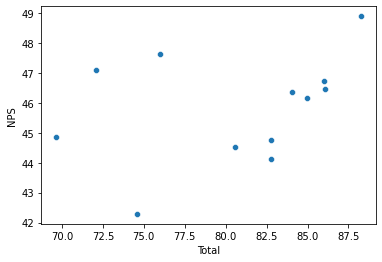

In [222]:
sns.scatterplot(data=x1, x="Total", y="NPS")

In [216]:
help(pd.DataFrame.iplot)

Help on function _iplot in module cufflinks.plotlytools:

_iplot(self, kind='scatter', data=None, layout=None, filename='', sharing=None, title='', xTitle='', yTitle='', zTitle='', theme=None, colors=None, colorscale=None, fill=False, width=None, dash='solid', mode='', interpolation='linear', symbol='circle', size=12, barmode='', sortbars=False, bargap=None, bargroupgap=None, bins=None, histnorm='', histfunc='count', orientation='v', boxpoints=False, annotations=None, keys=False, bestfit=False, bestfit_colors=None, mean=False, mean_colors=None, categories='', x='', y='', z='', text='', gridcolor=None, zerolinecolor=None, margin=None, labels=None, values=None, secondary_y='', secondary_y_title='', subplots=False, shape=None, error_x=None, error_y=None, error_type='data', locations=None, lon=None, lat=None, asFrame=False, asDates=False, asFigure=False, asImage=False, dimensions=None, asPlot=False, asUrl=False, online=None, **kwargs)
           Returns a plotly chart either as inline char

## CAC vs NPS Satisfacción (Sólo áreas de atención a Clientes)

In [209]:
aux[['DEUR', 'R09 + Corp', 'Total', 'NPS']].corr(method='pearson').style.background_gradient(cmap='PuBu')

,DEUR,R09 + Corp,Total,NPS
DEUR,1.000000,0.467845,0.953660,0.301628
R09 + Corp,0.467845,1.000000,0.669868,0.244443
Total,0.953660,0.669868,1.000000,0.349194
NPS,0.301628,0.244443,0.349194,1.000000


In [197]:
aux[['DEUR', 'R09 + Corp', 'Total', 'NPS']].corr().style.background_gradient(cmap='PuBu').to_excel('CAC_vs_Satis_AC_corr.xlsx')

In [198]:
a=df1.groupby([df1['FECHA_NPS'].dt.to_period('M'),'Region','Q3_NPS_GROUP'])['EMP'].count().unstack()
a.fillna(0,inplace=True)
a=(((a['Promotor']-a['Detractor'])/a.sum(axis=1).astype('int'))*100).unstack()
b=df1.groupby([df1['FECHA_NPS'].dt.to_period('M'),df1['Region'].map(lambda x: 'DEUR' if (x!='CORPORATIVO') & (x!='R09') else x),'Q3_NPS_GROUP'])['EMP'].count().unstack()
b.fillna(0,inplace=True)
b=(((b['Promotor']-b['Detractor'])/b.sum(axis=1).astype('int'))*100).unstack()
c=df1.groupby([df1['FECHA_NPS'].dt.to_period('M'),df1['Region'].map(lambda x: 'Total' if (x!='CORPORATIVO') | (x!='R09') else x),'Q3_NPS_GROUP'])['EMP'].count().unstack()
c.fillna(0,inplace=True)
c=(((c['Promotor']-c['Detractor'])/c.sum(axis=1).astype('int'))*100).unstack()
d=df1.groupby([df1['FECHA_NPS'].dt.to_period('M'),df1['Region'].map(lambda x: 'R09 + Corp' if (x=='CORPORATIVO') | (x=='R09') else x),'Q3_NPS_GROUP'])['EMP'].count().unstack()
d.fillna(0,inplace=True)
d=(((d['Promotor']-d['Detractor'])/d.sum(axis=1).astype('int'))*100).unstack()

In [199]:
aux=pd.concat([a,b['DEUR'],d['R09 + Corp'],c['Total']], axis=1)

In [200]:
aux=pd.concat([aux,cac['NPS']],axis=1)

In [201]:
aux[['DEUR', 'R09 + Corp', 'Total', 'NPS']].dropna().style.background_gradient(cmap='PuBu').to_excel('CAC_vs_ENPS_AC.xlsx')

## NPS CAC vs ENPS (Sólo áreas de atención a Clientes)

In [175]:
aux[['DEUR', 'R09 + Corp', 'Total', 'NPS']].corr().style.background_gradient(cmap='PuBu')

,DEUR,R09 + Corp,Total,NPS
DEUR,1.000000,0.270817,0.922061,0.112185
R09 + Corp,0.270817,1.000000,0.612298,-0.182765
Total,0.922061,0.612298,1.000000,0.017073
NPS,0.112185,-0.182765,0.017073,1.000000


In [202]:
aux[['DEUR', 'R09 + Corp', 'Total', 'NPS']].corr().style.background_gradient(cmap='PuBu').to_excel('CAC_vs_ENPS_AC_corr.xlsx')

In [203]:
aux[['DEUR', 'R09 + Corp', 'Total', 'NPS']].corr()

,DEUR,R09 + Corp,Total,NPS
DEUR,1.000000,0.270817,0.922061,0.112185
R09 + Corp,0.270817,1.000000,0.612298,-0.182765
Total,0.922061,0.612298,1.000000,0.017073
NPS,0.112185,-0.182765,0.017073,1.000000
